In [4]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

def show_image_gray(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

# funciton from ROS node

In [17]:
def detect_circles(image: np.ndarray)->np.ndarray:
    """
    Image is assumned to come as BGR (for now)
    """
    rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
    # Reduce the noise to avoid false circle detection
    gray = cv.medianBlur(gray, 5)

    rows = gray.shape[0]
    circles = cv.HoughCircles(image=gray, method=cv.HOUGH_GRADIENT,dp= 1,
                                minDist= rows / 8,
                                param1=100, param2=30,
                                minRadius=1, maxRadius=int(0.8*rows)
                                )
    
    return np.array([]) if circles is None else circles

def paint_circles_in_image(image: np.ndarray, circles: np.ndarray, n:int=1)->np.ndarray:
    """
    paints the fist n circles from 'circles' in the image
    """
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i, circle_i in enumerate(circles[0, :], start=1):
            if i > n:
                break
            center = (circle_i[0], circle_i[1])
            radius = circle_i[2]

            cv.circle(image, center, 1, (0, 100, 100), 3)
            cv.circle(image, center, radius, (255, 0, 255), 3)
            # write index next to circle center
            cv.putText(image, str(i), (circle_i[0], circle_i[1]), cv.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 255), 5)

    return image

def find_circles_in_image(image: np.ndarray, n:int=3)->np.ndarray:
    """
    Detects circles in the image and paints the first n circles in the image
    image: np.ndarray: image to detect circles in
    n: int: number of circles to paint in the image
    """
    circles = detect_circles(image)
    return circles, paint_circles_in_image(image, circles, n=n)


# visual functions

In [31]:
def paint_centerlines_in_image(image: np.ndarray)->np.ndarray:
    """
    Paints a horizontal and vertical line in the center of the image
    ---
    image: np.ndarray: image to paint the lines in
    """
    rows, cols = image.shape[:2]
    cv.line(image, (0, rows // 2), (cols, rows // 2), (0, 255, 0), 3)
    cv.line(image, (cols // 2, 0), (cols // 2, rows), (0, 255, 0), 3)
    return image

def paint_x_in_image(image: np.ndarray, x:int, y:int, x_line_length:int=10)->np.ndarray:
    """
    Paints a cross in the image at the given coordinates
    ---
    image: np.ndarray: image to paint the cross in
    x: int: x coordinate of the cross
    y: int: y coordinate of the cross
    """
    red_color = (0, 0, 255)
    blue_color = (255, 0, 0)
    cv.line(image, (x - x_line_length, y), (x + x_line_length, y), red_color, 10)
    cv.line(image, (x, y - x_line_length), (x, y + x_line_length), red_color, 10)
    return image

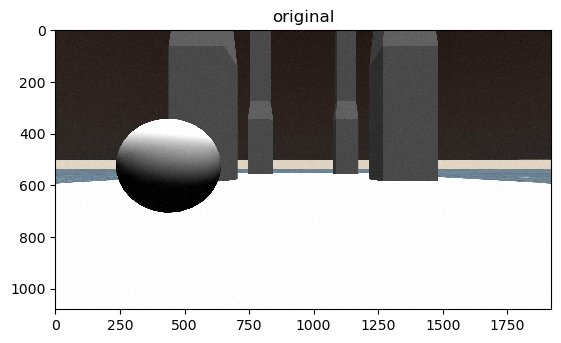

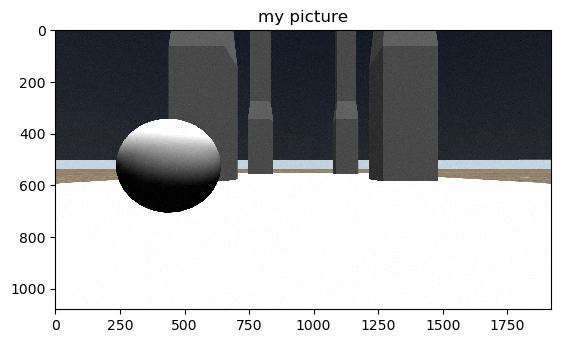

In [35]:
filename = '2.jpg'
bgr = og_img = cv.imread(filename)
show_image(og_img, 'original')

rgb = cv.cvtColor(og_img, cv.COLOR_BGR2RGB)
show_image(rgb, 'my picture')

gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
# Reduce the noise to avoid false circle detection
gray = cv.medianBlur(gray, 5)
# show_image_gray(gray, 'gray picture')


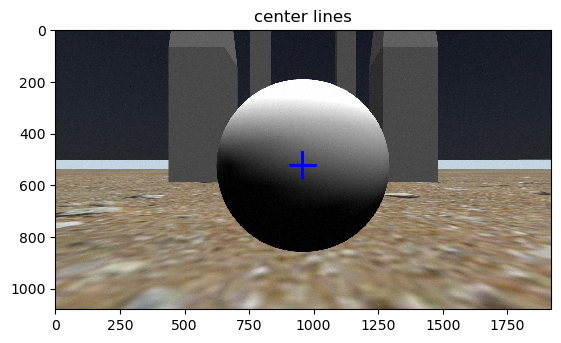

In [32]:
img = rgb.copy()
x, y = int(958.5), int(525.5) # u,v to pixel indices, not great
img_w_lines = paint_x_in_image(img, x,y, 50)
show_image(img_w_lines, 'center lines')

circles detected: (1, 1, 3)


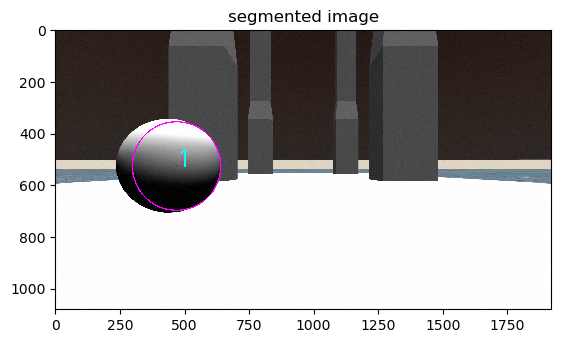

In [36]:
circles, segmented_img = find_circles_in_image(bgr) # TODO: take this functions to another module. Problem with setup.py
print(f"circles detected: {circles.shape}")
show_image(segmented_img, 'segmented image')

In [22]:
circle_1 = circles[0,0]
center_u, center_v, radius = circle_1
print(circle_1)

[958.5 525.5 334. ]
